In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [37]:
data=pd.read_csv("dataset/train.csv")

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 44 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_id                         58592 non-null  object 
 1   policy_tenure                     58592 non-null  float64
 2   age_of_car                        58592 non-null  float64
 3   age_of_policyholder               58592 non-null  float64
 4   area_cluster                      58592 non-null  object 
 5   population_density                58592 non-null  int64  
 6   make                              58592 non-null  int64  
 7   segment                           58592 non-null  object 
 8   model                             58592 non-null  object 
 9   fuel_type                         58592 non-null  object 
 10  max_torque                        58592 non-null  object 
 11  max_power                         58592 non-null  object 
 12  engi

Encode the object type features

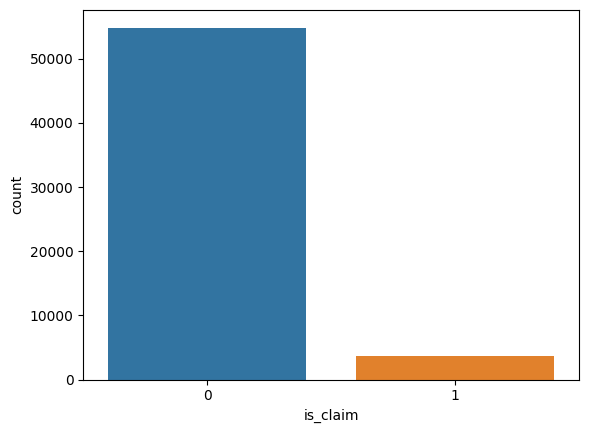

In [39]:
sns.countplot(x=data.is_claim)
plt.show()

> Dataset is skewed. Try the following:

`Stratification` 

`Downsampling` and `Upsampling`

In [5]:
from sklearn.model_selection import train_test_split
train_set,val_set=train_test_split(data,stratify=data["is_claim"])

In [41]:
# #Upsampling
# from sklearn.utils import resample

# min_class=train_set[train_set["is_claim"]==1]
# max_class=train_set[train_set["is_claim"]==0]
# up_sampled=resample(min_class,random_state=42,n_samples=len(max_class),replace=True)

# upsampled_data = pd.concat([up_sampled, max_class])


import imblearn
im=imblearn.over_sampling.SMOTE(random_state=42)
x=data.drop("is_claim",axis=1)
xres,yres = im.fit_resample(x,data["is_claim"])

ValueError: could not convert string to float: 'ID00001'

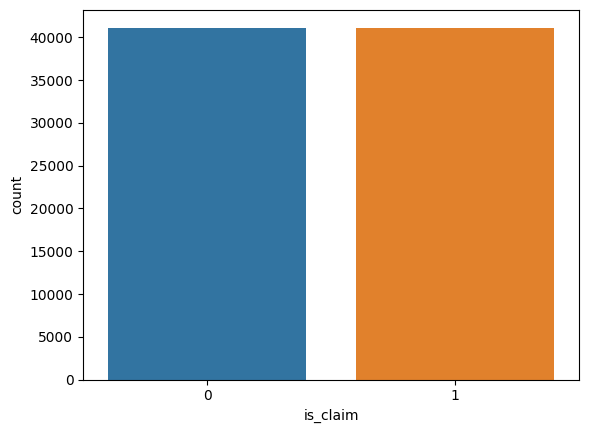

In [7]:
sns.countplot(x=upsampled_data.is_claim)
plt.show()

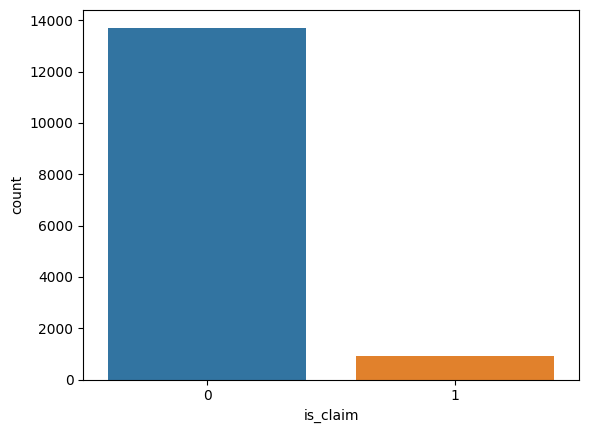

In [8]:
sns.countplot(x=val_set.is_claim)
plt.show()

In [9]:
upsampled_data.isnull().sum()

policy_id                           0
policy_tenure                       0
age_of_car                          0
age_of_policyholder                 0
area_cluster                        0
population_density                  0
make                                0
segment                             0
model                               0
fuel_type                           0
max_torque                          0
max_power                           0
engine_type                         0
airbags                             0
is_esc                              0
is_adjustable_steering              0
is_tpms                             0
is_parking_sensors                  0
is_parking_camera                   0
rear_brakes_type                    0
displacement                        0
cylinder                            0
transmission_type                   0
gear_box                            0
steering_type                       0
turning_radius                      0
length      

> no null values, no need of imputing for training.

`But have to handle it while building pipelines as test data can contain missing values`

In [10]:
upsampled_data.describe()

,policy_tenure,age_of_car,age_of_policyholder,population_density,make,airbags,displacement,cylinder,gear_box,turning_radius,length,width,height,gross_weight,ncap_rating,is_claim
count,82266.000000,82266.000000,82266.000000,82266.000000,82266.000000,82266.000000,82266.000000,82266.000000,82266.000000,82266.000000,82266.000000,82266.000000,82266.000000,82266.000000,82266.000000,82266.000000
mean,0.674116,0.066779,0.473948,18315.007002,1.759791,3.128121,1164.930627,3.637408,5.240452,4.852752,3852.089551,1673.824046,1552.639523,1384.848771,1.768629,0.500000
std,0.407475,0.055162,0.124667,17020.616751,1.139971,1.828140,264.321300,0.480751,0.427360,0.225935,308.451226,111.308351,78.913421,210.638669,1.389711,0.500003
min,0.002735,0.000000,0.288462,290.000000,1.000000,1.000000,796.000000,3.000000,5.000000,4.500000,3445.000000,1475.000000,1475.000000,1051.000000,0.000000,0.000000
25%,0.286252,0.020000,0.375000,6112.000000,1.000000,2.000000,998.000000,3.000000,5.000000,4.600000,3655.000000,1515.000000,1490.000000,1185.000000,0.000000,0.000000
50%,0.699768,0.060000,0.461538,8794.000000,1.000000,2.000000,1197.000000,4.000000,5.000000,4.800000,3845.000000,1735.000000,1530.000000,1335.000000,2.000000,0.500000
75%,1.067155,0.110000,0.548077,27003.000000,3.000000,6.000000,1493.000000,4.000000,5.000000,5.000000,3995.000000,1755.000000,1635.000000,1510.000000,3.000000,1.000000
max,1.386520,1.000000,1.000000,73430.000000,5.000000,6.000000,1498.000000,4.000000,6.000000,5.200000,4300.000000,1811.000000,1825.000000,1720.000000,5.000000,1.000000


> Values of policy_tenure, age_of_car, age_of_policyholder are normalised in the dataset. 

> Displacement, Length, width, height and gross weight are in different metrics

> Encoded features and remaining numeric features have values within 10

In [11]:
objList = upsampled_data.select_dtypes(include = "object").columns
print (objList)

Index(['policy_id', 'area_cluster', 'segment', 'model', 'fuel_type',
       'max_torque', 'max_power', 'engine_type', 'is_esc',
       'is_adjustable_steering', 'is_tpms', 'is_parking_sensors',
       'is_parking_camera', 'rear_brakes_type', 'transmission_type',
       'steering_type', 'is_front_fog_lights', 'is_rear_window_wiper',
       'is_rear_window_washer', 'is_rear_window_defogger', 'is_brake_assist',
       'is_power_door_locks', 'is_central_locking', 'is_power_steering',
       'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror',
       'is_ecw', 'is_speed_alert'],
      dtype='object')


In [31]:
#Label Encoding for object to numeric conversion
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for feat in objList:
    upsampled_data[feat] = le.fit_transform(upsampled_data[feat].astype(str))
    val_set[feat] = le.transform(val_set[feat].astype(str))


In [13]:
upsampled_data.head()

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
26026,19627,0.911156,0.04,0.451923,19,6112,3,4,5,1,...,1,1,1,1,1,0,1,1,3,1
30193,22744,1.196408,0.04,0.375000,20,8794,3,4,5,1,...,1,1,1,1,1,0,1,1,3,1
35903,27041,0.847226,0.01,0.576923,17,34738,1,0,0,0,...,0,0,0,1,0,0,0,1,0,1
55909,41955,1.001168,0.08,0.451923,20,8794,3,4,5,1,...,1,1,1,1,1,0,1,1,3,1
41268,31059,1.243011,0.14,0.490385,5,7788,4,2,6,1,...,0,1,1,1,0,0,1,1,5,1


<AxesSubplot: >

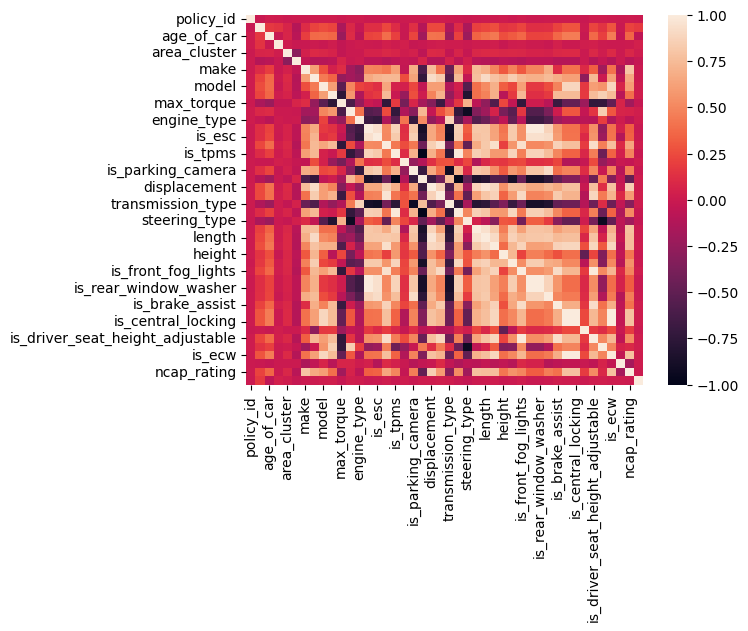

In [21]:
sns.heatmap(upsampled_data.corr())

In [19]:
corr_val=upsampled_data.corr()
corr_val["is_claim"].sort_values(ascending=False)

is_claim                            1.000000
policy_tenure                       0.173440
age_of_policyholder                 0.041061
max_power                           0.029869
is_day_night_rear_view_mirror       0.027368
fuel_type                           0.025144
cylinder                            0.023793
is_adjustable_steering              0.022880
is_front_fog_lights                 0.018223
area_cluster                        0.017479
model                               0.017367
is_driver_seat_height_adjustable    0.016603
is_brake_assist                     0.015782
rear_brakes_type                    0.013935
width                               0.013911
is_central_locking                  0.013911
is_power_door_locks                 0.013911
is_ecw                              0.013911
is_speed_alert                      0.010958
engine_type                         0.009154
displacement                        0.009132
transmission_type                   0.008797
is_parking

In [33]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
 
train_x=upsampled_data.drop("is_claim",axis=1)
train_y=upsampled_data["is_claim"]

val_x=val_set.drop("is_claim",axis=1)
val_y=val_set["is_claim"]

train_x=pd.DataFrame(scaler.fit_transform(train_x),columns=train_x.columns)
val_x=pd.DataFrame(scaler.transform(val_x),columns=val_x.columns)

In [34]:
from sklearn.linear_model import LogisticRegression
import joblib

classifier=LogisticRegression()
model=classifier.fit(train_x,train_y)
joblib.dump(model,"log_reg.pkl")
pred=model.predict(val_x)

from sklearn.metrics import f1_score
perf=f1_score(val_y,pred)
perf

0.11422968501041794